In [1]:
# Models
# Basic Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

# Neural Networks
from sklearn.neural_network import MLPClassifier

# Tree Based Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Probabilistic Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import  MultinomialNB

# Metrics' imports to analyze model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Feature Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer

# Data Management Imports
import numpy as np
import pandas as pd
import seaborn as sea;
import matplotlib.pyplot as plt

# Copy and Dump imports.
import pickle
from copy import deepcopy

In [2]:
# Uncomment this IFF the datasets need to be downloaded.
#!curl https://raw.githubusercontent.com/rasbt/musicmood/master/dataset/training/train_lyrics_1000.csv > train.csv
#!git clone https://github.com/rasbt/musicmood.git

In [6]:
# Load Training CSV
train = pd.read_csv("D:/Academic/Data Science/Music-Mood/data/training/train_lyrics_1000.csv")

# Load Validation CSV
validation = pd.read_csv("D:/Academic/Data Science/Music-Mood/data/validation/valid_lyrics_200.csv")

Done


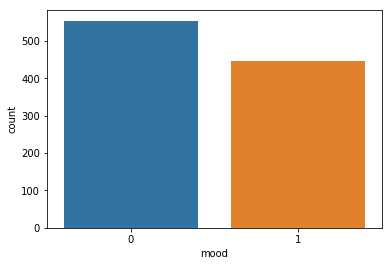

In [7]:
# Since we cannot pass Strings in a classifier, convert the labels into numbers.
train['mood'].replace({"happy":1,"sad":0}, inplace=True)
validation['mood'].replace({"happy":1,"sad":0}, inplace=True)

sea.countplot(train['mood'])

# Create X and Y
train_x = list(map(str,train.pop('lyrics')))
train_y = list(train.pop('mood'))

print("Done")

In [8]:
train.head()

,file,artist,title,genre,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Hip Hop/Rap,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Rock,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,Rock,2007
3,TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,R&B,1986
4,TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,Rock,1987


# Utility Functions 

In [9]:
# Generate a report on the Model's performance
# Model MUST be trained. Otherwise report will give random values
# @param : model (any SKLearn TRAINED Model should be fine)
# @param : data (A dictionary with keys {'train', 'validation'} and values as tuples (x, y))
# @param : name (A name for the Model. eg: 'Logistic Regression')
#
def generateClassificationReport(model, data, name) :
    
    # Get the Training Data
    train_x, train_y = data['train'];
    # Get the Test/Validation Data
    val_x, val_y = data['validation'];
  
    # A label map that will be used while plotting
    labels = ["Sad","Happy"]
    print("Report of training a : " + name + " classifier");
    
    # ---  Report on Training Set --- #
    # Set a figure for the plot
    print("Training Score")
    showReport(train_x, train_y, model, labels);
    
    # ---  Report on Validation Set --- #
    print("Validation Score Report")
    showReport(val_x, val_y, model, labels);


# Show the Classification Report and Proceed to build and display the Confusion Matrix 
# @param : x (The X value of a dataset)
# @param : Y (y_true of the dataset)
# @param : model (must be a TRAINED SKLearn Classficiation Model) An untrained model will give random results
# @param : labels (String values to be mapped to original label values ['Sad','Happy'])
#
def showReport(x, y, model, labels) :

    # Predict on training set (to see training accuracy)
    y_pred = model.predict(x);
    
    # Get a Classification Report. 
    print(classification_report(y_true = y, y_pred = y_pred, target_names=labels))
    
    # Build a heatmap using the result's confusion matrix.
    generateHeatmap(x, y, model, labels);
    

# Build and display the Confusion Matrix 
# @param : x (The X value of a dataset)
# @param : Y (y_true of the dataset)
# @param : model (must be a TRAINED SKLearn Classficiation Model) An untrained model will give random results
# @param : labels (String values to be mapped to original label values ['Sad','Happy'])
#
def generateHeatmap(x,y, model, labels) :
    fig, ax = plt.subplots(1,1)
    print("Confusion Matrix");
    sea.heatmap(confusion_matrix(y, model.predict(x)),annot=True,annot_kws={"size": 12},cmap='Blues', fmt='g', ax=ax, xticklabels=labels, yticklabels=labels)
    plt.show()


# Train and Test on an array of models. Choose the best Model and display a report.
# @param : models (A list of different SKLEARN CLASSIFICATION models)
# @param : name (A list of names for each of the Model in the same order as the 'models' object)
# @param : data (A dictionary with keys {'train', 'validation'} and values as tuples (x, y))
#
def ensemble(models, name, data) :
    
    # Get the Training Data
    train_x, train_y = data['train'];
    # Get the Test/Validation Data
    val_x, val_y = data['validation'];
    
    # Trackers for Best Model data
    bestModel, bestScore, bestName = None, 0.0, "";
    
    # Iterate over each Model, train, test and update the best model trackers.
    for model, name in zip(models, names) :
        # Train the Model
        model.fit(train_x, train_y);
        
        # Log the model name
        print("-----",name,"-----")
        
        # Log F1 Score on the training set. (To see how well the training set was learnt)
        y_pred = model.predict(train_x)
        # Log
        print("Train:", f1_score(y_true = train_y, y_pred = y_pred));
        
        # Log F1 Score on the validation set.
        y_pred = model.predict(val_x)
        # Get the F1-Score for Validation Set.
        f1 = f1_score(y_true = val_y, y_pred = y_pred)
        # Log
        print("Validation:", f1);
        print()
        # IFF test accuracy is better than all the previously computed accuracies, then update the trackers
        if f1 > bestScore :
            bestScore, bestModel, bestName = f1, model, name
    
    # Generate a Report (Classification Report and Confusion Matrix) on the best Model from the provided Models.
    generateClassificationReport(bestModel, data, bestName);
    
    # Return the trained models for user to save.
    return models

# Building a vectorized version of text data

In [10]:
# param : vectorizer (Any Valid Vectorizer [CountVector, TFIDF, HashingVector] can be passed to this function.)
def vectorizeAndTrain(vectorizer) :
    # Fit X into the vectorizer and transform using those weights
    x_train = vectorizer.fit_transform(train_x)

    # Transform validation X using the vectorizer above.
    x_val = vectorizer.transform(validation['lyrics'])

    # Create the Data Object
    data_tf = {'train': (x_train, train_y), "validation" : (x_val, validation['mood']) }

    # Train, Test and Generate a Report on the best Model.
    trainedModels = ensemble(deepcopy(models), names, data_tf)
    
    return {"vectorizer" : vectorizer, "models" : trainedModels};

In [11]:
# Models and Names

# Using LR, RF and SVM here. Add more for variations
models = [ LogisticRegression(solver = 'liblinear'),
          RandomForestClassifier(n_estimators = 50), 
          LinearSVC(max_iter = 10000, random_state = 2) ]

names = ["Logistic Regression", 
         "Random Forect", 
         "Support Vector Machine"];

# [Text Classification Basics](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)

# Approach 1 : Count Vector

In [12]:
# Count Vectorizer is one of the most basic ways to perform any kind of classification on text data.
from sklearn.feature_extraction.text import CountVectorizer

----- Logistic Regression -----
Train: 0.9977628635346756
Validation: 0.6179775280898877

----- Random Forect -----
Train: 0.9977628635346756
Validation: 0.3076923076923077

----- Support Vector Machine -----
Train: 0.9977578475336323
Validation: 0.6021505376344086

Report of training a : Logistic Regression classifier
Training Score
              precision    recall  f1-score   support

         Sad       1.00      1.00      1.00       554
       Happy       1.00      1.00      1.00       446

   micro avg       1.00      1.00      1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


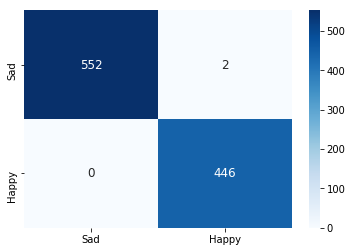

Validation Score Report
              precision    recall  f1-score   support

         Sad       0.61      0.81      0.69        95
       Happy       0.75      0.52      0.62       105

   micro avg       0.66      0.66      0.66       200
   macro avg       0.68      0.67      0.66       200
weighted avg       0.68      0.66      0.65       200

Confusion Matrix


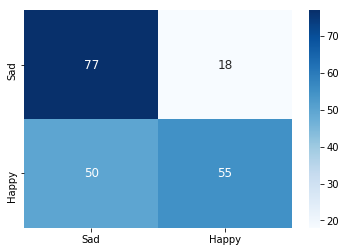

In [13]:
# Instantiate a CountVector
vectorizer = CountVectorizer(ngram_range=(1, 3))

# Vectorize the dataset, train, test and generate reports.
result = vectorizeAndTrain(vectorizer)

# Count Vector 

Train : I have a pineapple

fit_transform(train) Generates a vocabluary Dict -> {"I" : 1,"have": 1,....,"pineapple":1} and returns a sparse matrix

trasform(test) -> [ 1, 1, 0, 0 ]

Unigram -> I, have, a, pineapple

n-gram -> Unigram + Bigram + Trigram

Bi-Gram -> I have, have a, a pineapple

Tri-Gram -> I have a, have a pineapple

n-gram-range (1, 5) -> I, have, a, pineapple, I have, have a, a pineapple, ...

# Approach 2 : TFIDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Uni-Grams

----- Logistic Regression -----
Train: 0.9063231850117095
Validation: 0.6012269938650308

----- Random Forect -----
Train: 0.9977578475336323
Validation: 0.5895953757225433

----- Support Vector Machine -----
Train: 0.9944008958566628
Validation: 0.6914893617021277

Report of training a : Support Vector Machine classifier
Training Score
              precision    recall  f1-score   support

         Sad       1.00      0.99      1.00       554
       Happy       0.99      1.00      0.99       446

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       1.00      0.99      1.00      1000

Confusion Matrix


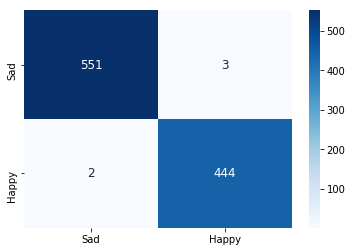

Validation Score Report
              precision    recall  f1-score   support

         Sad       0.66      0.81      0.73        95
       Happy       0.78      0.62      0.69       105

   micro avg       0.71      0.71      0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200

Confusion Matrix


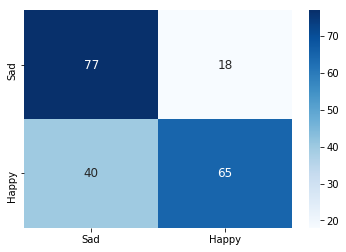

In [15]:
# Instantiate a TFIDF Vectorizer and use Unigrams ONLY.
# By using unigrams, you do not consider any previous or next word to the current word.
# This approch is good if the sample contains big paragraphs.
vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words='english');

# Vectorize the dataset, train, test and generate reports.
result = vectorizeAndTrain(vectorizer)

# Bi-Grams

----- Logistic Regression -----
Train: 0.9966329966329966
Validation: 0.296875

----- Random Forect -----
Train: 0.9909502262443438
Validation: 0.18487394957983194

----- Support Vector Machine -----
Train: 0.9966329966329966
Validation: 0.5125

Report of training a : Support Vector Machine classifier
Training Score
              precision    recall  f1-score   support

         Sad       1.00      1.00      1.00       554
       Happy       1.00      1.00      1.00       446

   micro avg       1.00      1.00      1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix


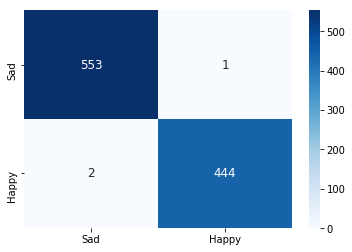

Validation Score Report
              precision    recall  f1-score   support

         Sad       0.56      0.85      0.68        95
       Happy       0.75      0.39      0.51       105

   micro avg       0.61      0.61      0.61       200
   macro avg       0.65      0.62      0.59       200
weighted avg       0.66      0.61      0.59       200

Confusion Matrix


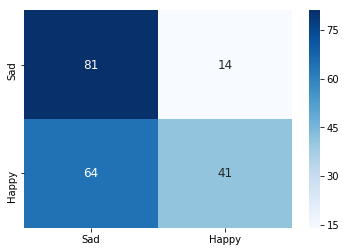

In [16]:
# Instantiate a TFIDF Vectorizer and use Bi-Grams ONLY.
# Example String : "a b c d e" 
# BiGrams would be : "ab, bc, cd, de", etc.
vectorizer = TfidfVectorizer(ngram_range=(2,2), stop_words='english');

# Vectorize the dataset, train, test and generate reports.
result = vectorizeAndTrain(vectorizer)

# Tri-Grams

----- Logistic Regression -----
Train: 0.9966329966329966
Validation: 0.23333333333333334

----- Random Forect -----
Train: 0.9840546697038723
Validation: 0.05555555555555556

----- Support Vector Machine -----
Train: 0.9966329966329966
Validation: 0.3111111111111111

Report of training a : Support Vector Machine classifier
Training Score
              precision    recall  f1-score   support

         Sad       1.00      1.00      1.00       554
       Happy       1.00      1.00      1.00       446

   micro avg       1.00      1.00      1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix


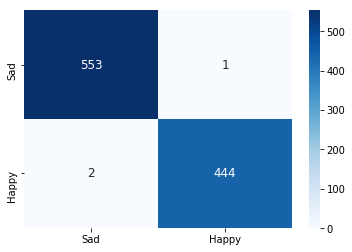

Validation Score Report
              precision    recall  f1-score   support

         Sad       0.51      0.91      0.65        95
       Happy       0.70      0.20      0.31       105

   micro avg       0.54      0.54      0.54       200
   macro avg       0.60      0.55      0.48       200
weighted avg       0.61      0.54      0.47       200

Confusion Matrix


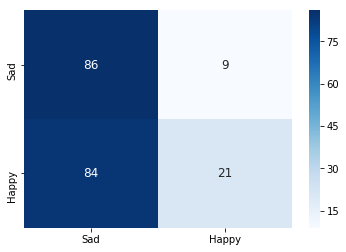

In [17]:
# Instantiate a TFIDF Vectorizer and use Tri-Grams ONLY.
# Example String : "a b c d e" 
# BiGrams would be : "abc, bcd, cde", etc.
# Not very good on small data samples because alot of data is lost
vectorizer = TfidfVectorizer(ngram_range=(3,3), stop_words='english');

# Vectorize the dataset, train, test and generate reports.
result = vectorizeAndTrain(vectorizer)

# N-Grams : Using range 1 to 5

----- Logistic Regression -----
Train: 0.9966329966329966
Validation: 0.522875816993464

----- Random Forect -----
Train: 0.9977528089887641
Validation: 0.4729729729729729

----- Support Vector Machine -----
Train: 0.9977578475336323
Validation: 0.7120418848167539

Report of training a : Support Vector Machine classifier
Training Score
              precision    recall  f1-score   support

         Sad       1.00      1.00      1.00       554
       Happy       1.00      1.00      1.00       446

   micro avg       1.00      1.00      1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix


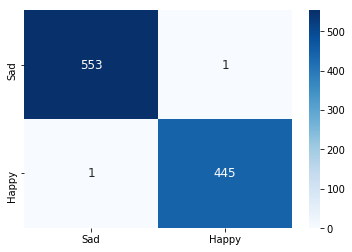

Validation Score Report
              precision    recall  f1-score   support

         Sad       0.68      0.81      0.74        95
       Happy       0.79      0.65      0.71       105

   micro avg       0.72      0.72      0.73       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.74      0.72      0.72       200

Confusion Matrix


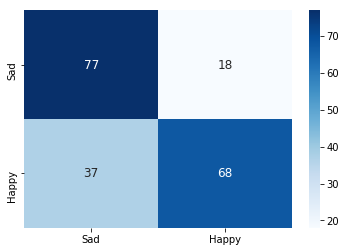

In [18]:
# Instantiate a TFIDF Vectorizer and use n-grams in the range 1 - 5.
# This is actually very good because it creates alot of variation.
# Example String : "a b c d e" 
# N-Grams would be : "a, ab, abc, abcd, abcde, b, bc, bcd, bcde", etc. 
# This will generate all the combinations in a sliding window of 5 words (PRESERVING THE ORDER).

vectorizer = TfidfVectorizer(ngram_range=(1,5), stop_words='english');

# Vectorize the dataset, train, test and generate reports.
result = vectorizeAndTrain(vectorizer)